In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['training.1600000.processed.noemoticon.csv']


In [2]:
import pandas as pd
import numpy as np
import re
from nltk import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Import And Explore the Data

In [3]:
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv('../input/training.1600000.processed.noemoticon.csv', encoding='latin1', names=cols)

In [4]:
#knowing the data 
df.info()
df['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment       1600000 non-null int64
id              1600000 non-null int64
date            1600000 non-null object
query_string    1600000 non-null object
user            1600000 non-null object
text            1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


4    800000
0    800000
Name: sentiment, dtype: int64

In [5]:
df.head()


,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Define Patterns to clean the data

In [6]:
pat1 = '@[^ ]+'
pat2 = 'http[^ ]+'
pat3 = 'www.[^ ]+'
pat4 = '#[^ ]+'
pat5 = '[0-9]'

combined_pat = '|'.join((pat1, pat2, pat3, pat4, pat5))


In [7]:
# Cleaning 

clean_tweet_texts = []
for t in df['text']:
    t = t.lower()
    stripped = re.sub(combined_pat, '', t)
    tokens = word_tokenize(stripped)
    words = [x for x  in tokens if len(x) > 1]
    sentences = " ".join(words)
    negations = re.sub("n't", "not", sentences)
    
    clean_tweet_texts.append(negations)


## Extracting the clean df and exploring it

In [8]:
clean_df = pd.DataFrame(clean_tweet_texts, columns=['text'])
clean_df['sentiment'] = df['sentiment'].replace({4:1})
clean_df.head()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text         1600000 non-null object
sentiment    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


### Extrcting Negative & Positive tweets

In [9]:
neg_tweets = clean_df[clean_df['sentiment']==0]
pos_tweets = clean_df[clean_df['sentiment']==1]


## Plot The Top 10 Words Before applying any weighting


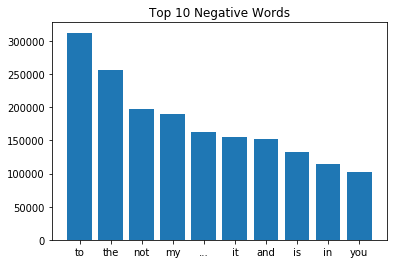

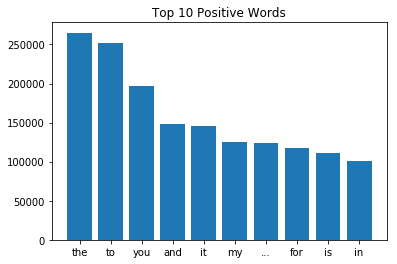

In [10]:
# Getting the value count for every word
neg = neg_tweets.text.str.split(expand=True).stack().value_counts()
pos = pos_tweets.text.str.split(expand=True).stack().value_counts()

# Transforming to lists
values_neg = neg.keys().tolist()
counts_neg = neg.tolist()

values_pos = pos.keys().tolist()
counts_pos = pos.tolist()

plt.bar(values_neg[0:10], counts_neg[0:10])
plt.title('Top 10 Negative Words')
plt.show()

plt.bar(values_pos[0:10], counts_pos[0:10])
plt.title('Top 10 Positive Words')

plt.show()



## Apply CountVectorizer and then plot top 10 Words 


In [11]:
cv = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1))

neg_cv = cv.fit_transform(neg_tweets['text'].tolist())
pos_cv = cv.fit_transform(pos_tweets['text'].tolist())


In [12]:
freqs_neg = zip(cv.get_feature_names(), neg_cv.sum(axis=0).tolist()[0])
freqs_pos = zip(cv.get_feature_names(), pos_cv.sum(axis=0).tolist()[0])


In [13]:
list_freq_neg = list(freqs_neg)
list_freq_pos = list(freqs_pos)

In [14]:
list_freq_neg.sort(key=lambda tup: tup[1], reverse=True)
list_freq_pos.sort(key=lambda tup: tup[1], reverse=True)


In [15]:
cv_words_neg = [i[0] for i in list_freq_neg]
cv_counts_neg = [i[1] for i in list_freq_neg]

cv_words_pos = [i[0] for i in list_freq_pos]
cv_counts_pos = [i[1] for i in list_freq_pos]


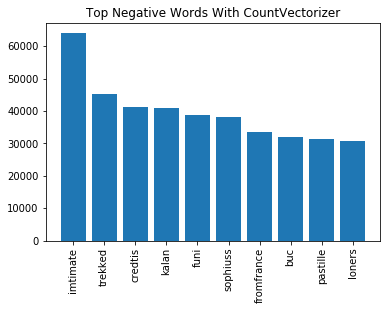

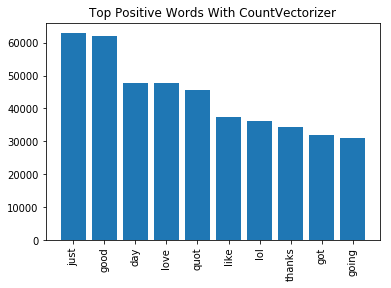

In [16]:
plt.bar(cv_words_neg[0:10], cv_counts_neg[0:10])
plt.xticks(rotation='vertical')
plt.title('Top Negative Words With CountVectorizer')
plt.show()

plt.bar(cv_words_pos[0:10], cv_counts_pos[0:10])
plt.xticks(rotation='vertical')
plt.title('Top Positive Words With CountVectorizer')
plt.show()



## Apply tf-idf vectorizer and then plot top 10 words


In [17]:
tv = TfidfVectorizer(stop_words='english', binary=False, ngram_range=(1,3))

neg_tv = tv.fit_transform(neg_tweets['text'].tolist())
pos_tv = tv.fit_transform(pos_tweets['text'].tolist())


In [18]:
freqs_neg_tv = zip(tv.get_feature_names(), neg_tv.sum(axis=0).tolist()[0])
freqs_pos_tv = zip(tv.get_feature_names(), pos_tv.sum(axis=0).tolist()[0])
list_freq_neg_tv = list(freqs_neg_tv)
list_freq_pos_tv = list(freqs_pos_tv)


In [19]:
list_freq_neg_tv.sort(key=lambda tup: tup[1], reverse=True)
list_freq_pos_tv.sort(key=lambda tup: tup[1], reverse=True)

cv_words_neg_tv = [i[0] for i in list_freq_neg_tv]
cv_counts_neg_tv = [i[1] for i in list_freq_neg_tv]

cv_words_pos_tv = [i[0] for i in list_freq_pos_tv]
cv_counts_pos_tv = [i[1] for i in list_freq_pos_tv]


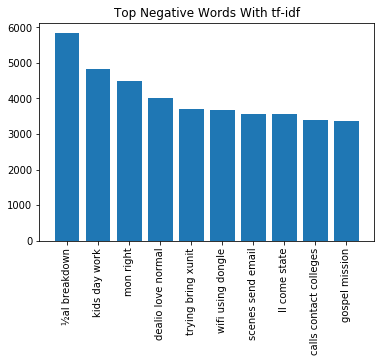

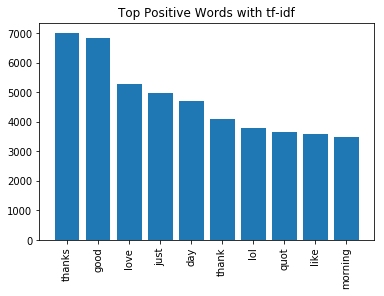

In [20]:
plt.bar(cv_words_neg_tv[0:10], cv_counts_neg_tv[0:10])
plt.xticks(rotation='vertical')
plt.title('Top Negative Words With tf-idf')
plt.show()

plt.bar(cv_words_pos_tv[0:10], cv_counts_pos_tv[0:10])
plt.xticks(rotation='vertical')
plt.title('Top Positive Words with tf-idf')
plt.show()



## Apply Logistic Regression with CountVectorizer


In [21]:
x = clean_df['text']
y = clean_df['sentiment']


In [22]:
cv = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,3))
x_cv = cv.fit_transform(x)


In [23]:
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(x_cv, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
log_cv = LogisticRegression() 
log_cv.fit(x_train_cv,y_train_cv)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
from sklearn.metrics import confusion_matrix
y_pred_cv = log_cv.predict(x_test_cv)
print(confusion_matrix(y_test_cv,y_pred_cv))
from sklearn.metrics import classification_report
print(classification_report(y_test_cv,y_pred_cv))


[[122029  37786]
 [ 30035 130150]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159815
           1       0.77      0.81      0.79    160185

   micro avg       0.79      0.79      0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



## Apply Logistic Regression With tf-idf


In [25]:
tv = TfidfVectorizer(stop_words='english', binary=False, ngram_range=(1,3))
x_tv = tv.fit_transform(x)
x_train_tv, x_test_tv, y_train_tv, y_test_tv = train_test_split(x_tv, y, test_size=0.2, random_state=0)

In [26]:
log_tv = LogisticRegression() 
log_tv.fit(x_train_tv,y_train_tv)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred_tv = log_tv.predict(x_test_tv)
print(confusion_matrix(y_test_tv,y_pred_tv))
print(classification_report(y_test_tv,y_pred_tv))


[[121191  38624]
 [ 29563 130622]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159815
           1       0.77      0.82      0.79    160185

   micro avg       0.79      0.79      0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

